In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [12]:
df1=df[df.TotalCharges!=' ']

In [14]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\avish\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
df.shape

(7043, 20)

In [13]:
df1.shape

(7032, 20)

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

C:\Users\avish\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


([array([877., 259., 159., 114., 102.,  98.,  72.,  70.,  46.,  72.]),
  array([ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.])],
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 Lists of Patches objects>)

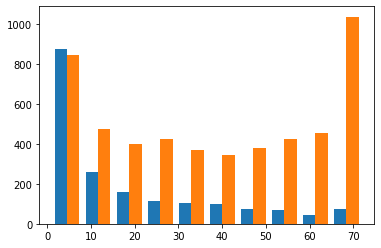

In [17]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.hist([tenure_churn_yes,tenure_churn_no])

In [18]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [24]:
print_unique_col_values(df1)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\avish\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines',
               'OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
               'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,"No":0},inplace=True)

C:\Users\avish\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [28]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [27]:
df1['gender'].replace({'Female':1,"Male":0},inplace=True)

C:\Users\avish\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [32]:
df2=pd.get_dummies(data=df1,columns=['InternetService',"Contract","PaymentMethod"])

In [33]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [35]:
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [36]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [40]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=5)

In [43]:
import tensorflow as tf
from tensorflow import keraseras

In [73]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
   
    keras.layers.Dense(1,activation='sigmoid')
])

In [74]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [75]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
5625/5625 [==============================] - 0s 82us/sample - loss: 0.5304 - acc: 0.7385
Epoch 2/100
5625/5625 [==============================] - 0s 38us/sample - loss: 0.4336 - acc: 0.7964
Epoch 3/100
5625/5625 [==============================] - 0s 29us/sample - loss: 0.4234 - acc: 0.8036
Epoch 4/100
5625/5625 [==============================] - 0s 50us/sample - loss: 0.4182 - acc: 0.8016
Epoch 5/100
5625/5625 [==============================] - 0s 50us/sample - loss: 0.4151 - acc: 0.8050
Epoch 6/100
5625/5625 [==============================] - 0s 56us/sample - loss: 0.4147 - acc: 0.8080
Epoch 7/100
5625/5625 [==============================] - 0s 57us/sample - loss: 0.4128 - acc: 0.8091
Epoch 8/100
5625/5625 [==============================] - 0s 55us/sample - loss: 0.4118 - acc: 0.8068
Epoch 9/100
5625/5625 [==============================] - 0s 46us/sample - loss: 0.4102 - acc: 0.8068
Epoch 10/100
5625/5625 [==============================] - 0s 30us/sample - loss: 0.4097 - a

5625/5625 [==============================] - 0s 30us/sample - loss: 0.3822 - acc: 0.8208
Epoch 81/100
5625/5625 [==============================] - 0s 48us/sample - loss: 0.3819 - acc: 0.8199
Epoch 82/100
5625/5625 [==============================] - 0s 51us/sample - loss: 0.3818 - acc: 0.8245
Epoch 83/100
5625/5625 [==============================] - 0s 57us/sample - loss: 0.3822 - acc: 0.8206
Epoch 84/100
5625/5625 [==============================] - 0s 60us/sample - loss: 0.3817 - acc: 0.8224
Epoch 85/100
5625/5625 [==============================] - 0s 55us/sample - loss: 0.3814 - acc: 0.8190
Epoch 86/100
5625/5625 [==============================] - 0s 45us/sample - loss: 0.3806 - acc: 0.8190
Epoch 87/100
5625/5625 [==============================] - 0s 29us/sample - loss: 0.3809 - acc: 0.8213
Epoch 88/100
5625/5625 [==============================] - 0s 44us/sample - loss: 0.3814 - acc: 0.8199
Epoch 89/100
5625/5625 [==============================] - 0s 56us/sample - loss: 0.3811 - acc: 

In [76]:
model.evaluate(X_test,y_test)

1407/1407 [==============================] - 0s 48us/sample - loss: 0.4553 - acc: 0.7910


[0.4552529608432333, 0.7910448]